How many nodes in your graph?5


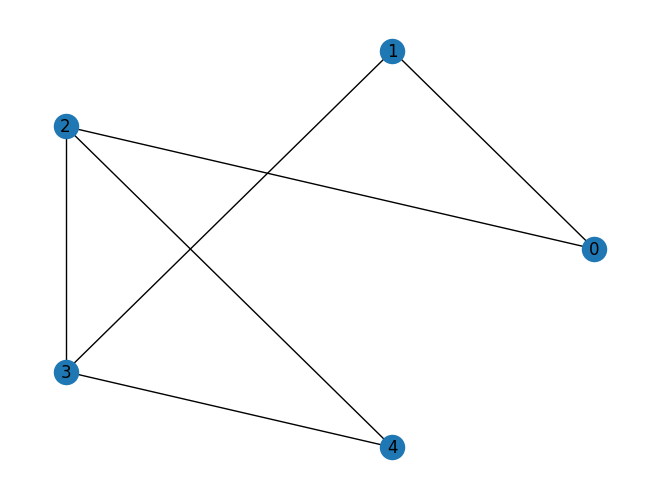

In [55]:
#Generate a graph with inputted number of nodes
import networkx as nx
import numpy as np
nodes = int(input("How many nodes in your graph?"))
G = nx.erdos_renyi_graph(nodes, 0.6, seed = 100)
nx.draw_circular(G, with_labels = True)

In [62]:
#Generate adjacency matrix for previous graph
adjM_G = nx.to_numpy_array(G)
A = adjM_G.astype(int)
A

array([[0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [0, 0, 1, 1, 0]])

In [60]:
#Function to find number of paths of length 2
u = 0
w = 0
def number_of_paths_length_two(H, u, w):
    list_u = list(H.neighbors(u))
    list_w = list(H.neighbors(w))
    paths=0
    for x in list_u:
        if x in list_w:
            paths = paths + 1
        else:
             pass
    return paths

In [63]:
# Excecuting graph
x = int(input("First node"))
y = int(input("Second node"))
number_of_paths_betweenxandy = number_of_paths_length_two(G,x,y)
print(f"number of paths od length 2 between {x} and {y} is {number_of_paths_betweenxandy}")

First node2
Second node4
number of paths od length 2 between 2 and 4 is 1


In [68]:
# want to check if the number of paths of length two for each pair of node correspons to the asjacency matrix squared
B = A @ A
n = G.number_of_nodes()
test = True
for i in range(n):
    for j in range(n):
        number_of_paths_i_j = number_of_paths_length_two(G, i, j)
        if B[i, j] != number_of_paths_i_j:
            test = False  # found a mismatch
# set final message based on test
if test:
    ans = "All values agree. The number of paths of length two between nodes i and j correspond to B[i,j]."
else:
    ans = "At least one of the values disagrees. The number of paths of length two between nodes i and j does not correspond to B[i,j]."
    print(test, ans)

In [37]:
# Generate random graph, no. of nodes can be changed
m = 15
random_graph = nx.erdos_renyi_graph(m, 0.6, seed = 123)

In [38]:
edges = random_graph.number_of_edges()

In [39]:
#Finding the probabiliy in getting between a certain number of esgdes
import math
probability1 = 0
n1 = m * (m - 1) // 2
for i in range(40,66): # 40 and 66 can be changed
    probability1 = probability1 + (math.comb(n1,i)*(0.6**i)*(0.4**(n1-i)))

probability1


0.6888768234099202

Connected? False


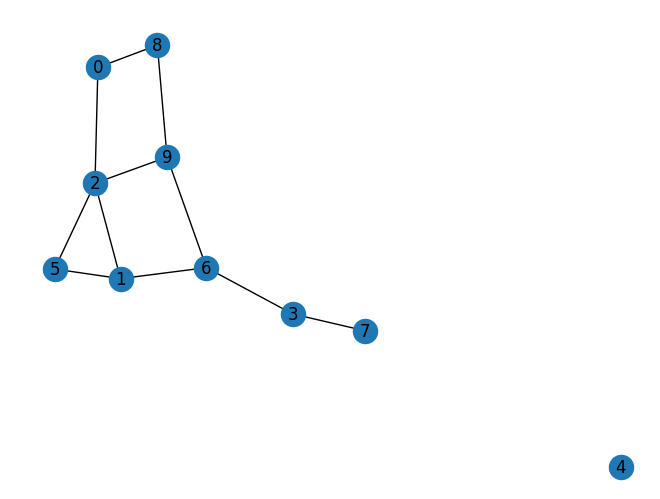

In [69]:
#Code to check if a graph is connected; strategy is to iterate through the adjacency matrix, and for each 0 check for common neighbours and repeat
import networkx as nx
import numpy as np
def has_all_ones(X):
    #Check if all entries in a matrix X are 1.
    return np.all(X == 1)
def is_connected(g):
    #Check if an undirected graph g is connected using iterative closure.
    n = len(g.nodes)
    #Build adjacency matrix
    mat = np.zeros((n, n), dtype=int)
    for u, v in g.edges:
        mat[u, v] = 1
        mat[v, u] = 1  #ensure symmetry for undirected graph

 #Iteratively propagate connectivity
    mat2 = mat.copy()
    while not has_all_ones(mat2):
        updated = mat2.copy()
        for i in range(n):
            for j in range(n):
                if mat2[i, j] == 0:
                    #check if i and j have a common neighbor
                    for k in range(n):
                        if mat2[i, k] == 1 and mat2[j, k] == 1:
                            updated[i, j] = 1
                            updated[j, i] = 1
                            break
        if np.array_equal(mat2, updated):
            #No further updates, connectivity cannot be completed
            break
        mat2 = updated

    return has_all_ones(mat2)
test = nx.erdos_renyi_graph(10, 0.2, seed=42)
nx.draw(test, with_labels=True)
print("Connected?", is_connected(test))